## Benchmarking of Insertion sort and Merge sort
Ingrid-Helena Hansen, Sigurd Nordtveit Hjerde, Andrea Øwre

### Importing modules and generating data

In [3]:
import numpy as np
from numpy.random import randint

import timeit
import copy
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [4]:
np.random.seed(1)
data = randint(0,10,100)
data = data.tolist()

### Insertion sort

In [5]:
def insertion_sort(A):
    for i in range(2, len(A)):
        key = A[i]
        j = i - 1
        while j >= 0 and A[j] > key:
            A[j+1] = A[j]
            j = j - 1
        A[j+1] = key

In [6]:
insertion_sort(data)
np.array(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

### Merge sort

In [7]:
## Merge sort

def merge_sort(A):
  if len(A) > 1:
    q = len(A) // 2
    L = A[:q]
    R = A[q:]

    merge_sort(L)
    merge_sort(R)

    i = j = k = 0

    while i < len(L) and j < len(R):
      if L[i] <= R[j]:
        A[k] = L[i]
        i += 1
      else:
        A[k] = R[j]
        j += 1
      k += 1
    
    while i < len(L):
      A[k] = L[i]
      i += 1
      k += 1
    
    while j < len(R):
      A[k] = R[j]
      j += 1
      k += 1

In [8]:
merge_sort(data)
np.array(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

### Benchmarking

In [25]:
data_size = [10, 50, 100, 500, 1000, 5000, 10000]

In [26]:
dataframe_ins = pd.DataFrame()
dataframe_merg = pd.DataFrame()
for size in data_size:
    col_in = []
    col_mer = []
    b_c = [i for i in range(size)]
    w_c = [size-i for i in range(size)]
    a_c = []
    for x in range(size):
        a_c.append(random.randint(0,100))
    box_plot_i = []
    box_plot_m = []
    for data in [b_c, a_c, w_c]:
        clock_insert = timeit.Timer(
            stmt='sort_func(copy(data))',
            globals={'sort_func': insertion_sort,
                     'data': data,
                     'copy': copy.copy})
        t_insert = clock_insert.repeat(
            repeat=5,
              number=clock_insert.autorange()[0])
        col_in.append(np.mean(t_insert))
        clock_merge = timeit.Timer(
            stmt='sort_func(copy(data))',
            globals={'sort_func': merge_sort,
                     'data': data,
                     'copy': copy.copy})
        t_merge = clock_merge.repeat(
            repeat=5,
            number=clock_merge.autorange()[0])
        col_mer.append(np.mean(t_merge))
        if size == 10000:
            box_plot_i.append(t_insert)
            box_plot_m.append(t_merge)
    dataframe_ins[f'{size}'] = col_in
    dataframe_merg[f'{size}'] = col_mer

print(dataframe_merg)
print(dataframe_ins)
print(box_plot_i)
print(box_plot_m)

         10        50       100       500      1000      5000     10000
0  0.271852  0.461537  0.205940  0.257541  0.285422  0.342256  0.361499
1  0.304065  0.211837  0.243313  0.306123  0.343686  0.211946  0.228538
2  0.319140  0.493580  0.216573  0.265787  0.295502  0.351938  0.368614
         10        50       100       500      1000      5000     10000
0  0.350902  0.401767  0.313253  0.421788  0.388222  0.191766  0.378384
1  0.370152  0.441070  0.336382  0.465061  0.197761  1.047856  4.102122
2  0.409577  0.366164  0.355909  0.366524  0.390658  2.076316  8.168054
[[0.37891229998786, 0.3803160000243224, 0.37694659997941926, 0.37793660000897944, 0.37780800001928583], [4.115443399990909, 4.108390900015365, 4.096879899967462, 4.087204499985091, 4.102689700026531], [8.158896700013429, 8.193476699991152, 8.165366899978835, 8.161697100033052, 8.160830500011798]]
[[0.36317770002642646, 0.3585577999474481, 0.3634434000123292, 0.361562000005506, 0.3607549999724142], [0.23594779998529702, 0

### Plotting

C:\Users\Eier\AppData\Local\Temp\ipykernel_9236\1179604793.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10)


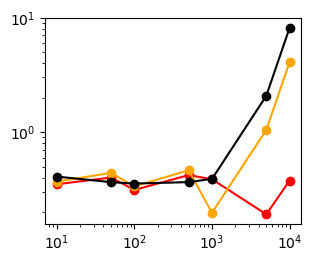

In [58]:
best_case  = dataframe_ins.iloc[0,:]
avg_case   = dataframe_ins.iloc[1,:]
worst_case = dataframe_ins.iloc[2,:]

#plt.style.use('seaborn-v0_8-colorblind')
cm = 1/2.54
plt.figure(figsize=(8.4*cm,6.8*cm))
plt.plot(data_size, best_case, '-o', color = 'red')
plt.plot(data_size, avg_case, '-o', color = 'orange')
plt.plot(data_size, worst_case, '-o', color = 'black')

plt.xscale('log')
plt.yscale('log')
plt.ylim(0,10)
#plt.xlabel('Data size')
#plt.ylabel('Time (seconds)')
#plt.title('Insertion sort benchmark results')
plt.savefig('Insertion_sort_bench.pdf')
plt.show()



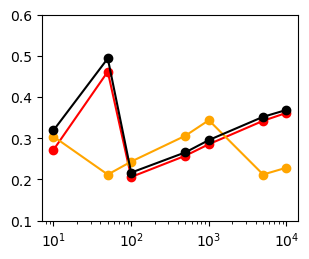

In [59]:
best_case_m  = dataframe_merg.iloc[0,:]
avg_case_m  = dataframe_merg.iloc[1,:]
worst_case_m = dataframe_merg.iloc[2,:]

#plt.style.use('seaborn-v0_8-colorblind')
cm = 1/2.54
plt.figure(figsize=(8.4*cm,6.8*cm))

plt.plot(data_size, best_case_m, '-o', color = 'red')
plt.plot(data_size, avg_case_m, '-o', color = 'orange')
plt.plot(data_size, worst_case_m, '-o', color ='black')

plt.xscale('log')
#plt.yscale('log')
plt.ylim(0.1,0.6)
#plt.xlabel('Data size')
#plt.ylabel('Time (seconds)')
#plt.title('Merge sort benchmark results')
plt.savefig('merge_sort_bench.pdf')
plt.show()



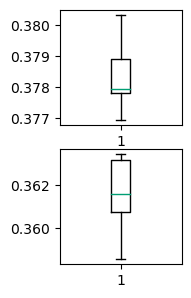

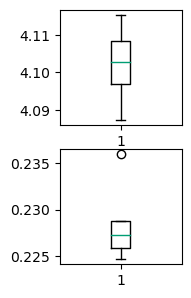

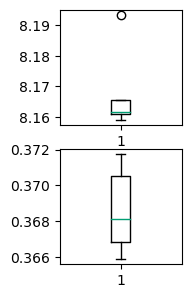

In [79]:
#cm = 1/2.54
#fig, axs = plt.subplots(2, 3, figsize=(6.4*cm,8.4*cm))
cases = ['Best case', 'Avrage case', 'Worst case']

for ind in range(3):
  cm = 1/2.54
  fig, axs = plt.subplots(2, 1, figsize=(4*cm,8.4*cm))
  axs[0].boxplot(box_plot_i[ind])
  #axs[0].set_title(f'{cases[ind]}', fontsize=8)
  axs[1].boxplot(box_plot_m[ind])
  #axs[1].set_title(f'{cases[ind]}', fontsize=8)

#fig.suptitle('Sorting Algorithm Performance', fontsize=16, y=1.05)
  #axs[0].set_ylabel('Insertion Sort', fontsize=8)
  #axs[1].set_ylabel('Merge Sort', fontsize=8)
  plt.tight_layout
  plt.savefig('boxplot_bench'+f'{ind}'+'.pdf')
  plt.show()

